## Question 1: Funding quality and measure per year correlation with ELA and math performance

Last updated on 3/26/20


**Hypothesis**: If art programs affect student performance, then schools with stronger indicators of funding will have significantly different math and ela state test scores than schools with weaker indicators of funding.

**Null hypothesis**: If art programs do not affect student performance, then schools with stronger indicators of funding will not have significantly different math and ELA state test scores than schools with weaker indicators of funding.

**Indicators of funding** will be: (a) number of funding sources, (b) self-report of increase or decrease in funding, and (c) self-report of adequate or inadequate funding). 

**Math/ELA performance** will be measured by pass rate (proportion of students earning a score of 3 or 4).

### Data

Annual Arts Education Survey: https://data.cityofnewyork.us/browse/select_dataset?Dataset-Information_Agency=Department+of+Education+%28DOE%29&nofederate=true&suppressed_facets[]=domain&utf8=✓&sortBy=relevance&q=Arts%20Data%20Survey 

New York State Test Results: https://infohub.nyced.org/reports/academics/test-results 

In [133]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import json

## Dataset 1: Arts Data

In [63]:
# arts_2014_2015_file = "2014-2015_Arts_Survey_Data.csv"
# arts_2015_2016_file = "2015-2016_Arts_Survey_Data.csv"
arts_2016_2017_file = "2016-2017_Arts_Survey_Data.csv"
arts_2017_2018_file = "2017-2018_Arts_Survey_Data.csv"
arts_2018_2019_file = "2018-2019_Arts_Survey_Data.csv"

# arts_2014_2015 = pd.read_csv(arts_2014_2015_file, low_memory=False)
# arts_2015_2016 = pd.read_csv(arts_2015_2016_file, low_memory=False)
arts_2016_2017 = pd.read_csv(arts_2016_2017_file, low_memory=False)
arts_2017_2018 = pd.read_csv(arts_2017_2018_file, low_memory=False)
arts_2018_2019 = pd.read_csv(arts_2018_2019_file, low_memory=False)


arts_2016_2017['Year'] = 2017
arts_2017_2018['Year'] = 2018
arts_2018_2019['Year'] = 2019

## Data  Dictionaries: 

### 2016-2017

**Q34:** Did your school receive the following funding sources (non-DOE) to support arts education in this school year (*check all that apply*)?

(Yes/No radio buttons)

**Funding Sources**
* Cultural organizations
* Education association
* Federal, state, or city grants
* Local business or corporation
* Private foundation
* PTA/PA
* State, county, local arts councils

---

**Q35:** Funding for the arts is generally:

* Abundant
* Sufficient
* Insufficient
* N/A

---

**Q36:** Funding over the past three years has:

* Increased
* Decreased
* Remained the same

### 2017-2018

**Q36:** Did your school receive the following funding sources (non-DOE) to support arts education in this school year (*check all that apply*)?

(Yes/No radio buttons)

**Funding Sources**
* Cultural organizations
* Education association
* Federal, state, or city grants
* Local business or corporation
* Private foundation
* PTA/PA
* State, county, local arts councils

---

**Q37:** Funding for the arts is generally:

* Abundant
* Sufficient
* Insufficient
* N/A

---

**Q38:** Funding over the past three years has:

* Increased
* Decreased
* Remained the same

### 2018-2019

**Q32:** Did your school receive the following funding sources (non-DOE) to support arts education in this school year (*check all that apply*)?

(Yes/No radio buttons)

**Funding Sources**
* Cultural organizations
* Education association
* Federal, state, or city grants
* Local business or corporation
* Private foundation
* PTA/PA
* State, county, local arts councils

---

**Q33:** Funding for the arts is generally:

* Abundant
* Sufficient
* Insufficient
* N/A

---

**Q34:** Funding over the past three years has:

* Increased
* Decreased
* Remained the same

## Clean/Explore Dataset 1

In [64]:
#print(str(arts_2016_2017.columns))

# Q34, Q35, Q36
# # Note: for Q34, quetions with the 'C1' and 'C2' suffixes are redundant because they are inverses of each other
# funding_2016_2017 = arts_2016_2017[['Q0_DBN', 
#                                     'Q34_R1_C1', 'Q34_R1_C2', 'Q34_R2_C1', 'Q34_R2_C2',
#                                     'Q34_R3_C1', 'Q34_R3_C2', 'Q34_R4_C1', 'Q34_R4_C2', 
#                                     'Q34_R5_C1','Q34_R5_C2', 'Q34_R6_C1', 'Q34_R6_C2',
#                                     'Q34_R7_C1', 'Q34_R7_C2',
#                                     'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 
#                                     'Q36_1', 'Q36_2', 'Q36_3']]


# Q34, Q35, Q36
funding_2016_2017 = arts_2016_2017[['Q0_DBN',
                                    'Year',
                                    'Q34_R1_C1', 
                                    'Q34_R2_C1',
                                    'Q34_R3_C1',
                                    'Q34_R4_C1',
                                    'Q34_R5_C1',
                                    'Q34_R6_C1',
                                    'Q34_R7_C1', 
                                    'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 
                                    'Q36_1', 'Q36_2', 'Q36_3']]

funding_2016_2017.head()

,Q0_DBN,Year,Q34_R1_C1,Q34_R2_C1,Q34_R3_C1,Q34_R4_C1,Q34_R5_C1,Q34_R6_C1,Q34_R7_C1,Q35_1,Q35_2,Q35_3,Q35_4,Q36_1,Q36_2,Q36_3
0,01M015,2017,1,0,1,1,1,0,1,0,0,1,0,0,0,1
1,01M019,2017,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2017,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,01M034,2017,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M515,2017,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [65]:
# print(str(arts_2017_2018.columns))

# # Q36, Q37, Q38
# # Note: for Q36, quetions with the 'C1' and 'C2' suffixes are redundant because they are  inverses of each other
# funding_2017_2018 = arts_2017_2018[['Q0_DBN', 
#                                    'Q36_R1_C1','Q36_R1_C2',
#                                     'Q36_R2_C1', 'Q36_R2_C2', 
#                                     'Q36_R3_C1', 'Q36_R3_C2', 
#                                     'Q36_R4_C1', 'Q36_R4_C2',
#                                     'Q36_R5_C1', 'Q36_R5_C2', 
#                                     'Q36_R6_C1', 'Q36_R6_C2', 
#                                     'Q36_R7_C1','Q36_R7_C2', 
#                                     'Q37_1', 'Q37_2', 
#                                     'Q37_3', 'Q37_4', 
#                                     'Q38_1', 'Q38_2','Q38_3']]


# # Q36, Q37, Q38
funding_2017_2018 = arts_2017_2018[['Q0_DBN',
                                    'Year',
                                   'Q36_R1_C1',
                                    'Q36_R2_C1', 
                                    'Q36_R3_C1',
                                    'Q36_R4_C1',
                                    'Q36_R5_C1',
                                    'Q36_R6_C1',
                                    'Q36_R7_C1',
                                    'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 
                                    'Q38_1', 'Q38_2','Q38_3']]

funding_2017_2018.head()

,Q0_DBN,Year,Q36_R1_C1,Q36_R2_C1,Q36_R3_C1,Q36_R4_C1,Q36_R5_C1,Q36_R6_C1,Q36_R7_C1,Q37_1,Q37_2,Q37_3,Q37_4,Q38_1,Q38_2,Q38_3
0,01M015,2018,1,1,1,1,1,0,1,0,0,1,0,0,0,1
1,01M019,2018,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2018,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,01M034,2018,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M063,2018,0,0,1,0,0,1,1,0,0,1,0,0,1,0


In [66]:
#print(str(arts_2018_2019.columns))

# # Q32, Q33, Q34
# # Note: for Q32, quetions with the 'C1' and 'C2' suffixes are redundant because they are  inverses of each other
# funding_2018_2019 = arts_2018_2019[['Q0_DBN', 
#                                     ' Q32_R1_C1', ' Q32_R1_C2', ' Q32_R2_C1',
#                                     ' Q32_R2_C2', ' Q32_R3_C1', ' Q32_R3_C2', 
#                                     ' Q32_R4_C1', ' Q32_R4_C2',' Q32_R5_C1', 
#                                     ' Q32_R5_C2', ' Q32_R6_C1', ' Q32_R6_C2', 
#                                     ' Q32_R7_C1',' Q32_R7_C2', 
#                                     'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 
#                                     'Q34_1', 'Q34_2','Q34_3']]


# Q32, Q33, Q34
funding_2018_2019 = arts_2018_2019[['Q0_DBN',
                                    'Year',
                                    ' Q32_R1_C1',
                                    ' Q32_R2_C1',
                                    ' Q32_R3_C1', 
                                    ' Q32_R4_C1',
                                    ' Q32_R5_C1', 
                                    ' Q32_R6_C1',
                                    ' Q32_R7_C1', 
                                    'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 
                                    'Q34_1', 'Q34_2','Q34_3']]



funding_2018_2019.head()

,Q0_DBN,Year,Q32_R1_C1,Q32_R2_C1,Q32_R3_C1,Q32_R4_C1,Q32_R5_C1,Q32_R6_C1,Q32_R7_C1,Q33_1,Q33_2,Q33_3,Q33_4,Q34_1,Q34_2,Q34_3
0,01M015,2019,1,0,0,1,1,0,0,0,0,1,0,0,1,0
1,01M019,2019,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2019,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,01M034,2019,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M063,2019,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [67]:
# Rename columns

funding_2016_2017 = funding_2016_2017.rename(columns={'Q0_DBN': 'DBN', 
                                    'Q34_R1_C1': 'Q1_cultural_org',
                                    'Q34_R2_C1': 'Q1_education_assoc',
                                    'Q34_R3_C1': 'Q1_grants', 
                                    'Q34_R4_C1': 'Q1_local_business',
                                    'Q34_R5_C1': 'Q1_private_foundation', 
                                    'Q34_R6_C1': 'Q1_PTA_PA',
                                    'Q34_R7_C1': 'Q1_arts_council', 
                                    'Q35_1': 'Q2_abundant', 'Q35_2': 'Q2_sufficient', 
                                    'Q35_3': 'Q2_insufficient', 'Q35_4': 'Q2_na', 
                                    'Q36_1': 'Q3_increased', 'Q36_2': 'Q3_decreased','Q36_3':'Q3_same'})
funding_2016_2017.head()

,DBN,Year,Q1_cultural_org,Q1_education_assoc,Q1_grants,Q1_local_business,Q1_private_foundation,Q1_PTA_PA,Q1_arts_council,Q2_abundant,Q2_sufficient,Q2_insufficient,Q2_na,Q3_increased,Q3_decreased,Q3_same
0,01M015,2017,1,0,1,1,1,0,1,0,0,1,0,0,0,1
1,01M019,2017,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2017,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,01M034,2017,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M515,2017,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [68]:
# Rename columns

funding_2017_2018 = funding_2017_2018.rename(columns={'Q0_DBN': 'DBN', 
                                    'Q36_R1_C1': 'Q1_cultural_org',
                                    'Q36_R2_C1': 'Q1_education_assoc',
                                    'Q36_R3_C1': 'Q1_grants', 
                                    'Q36_R4_C1': 'Q1_local_business',
                                    'Q36_R5_C1': 'Q1_private_foundation', 
                                    'Q36_R6_C1': 'Q1_PTA_PA',
                                    'Q36_R7_C1': 'Q1_arts_council', 
                                    'Q37_1': 'Q2_abundant', 'Q37_2': 'Q2_sufficient', 
                                    'Q37_3': 'Q2_insufficient', 'Q37_4': 'Q2_na', 
                                    'Q38_1': 'Q3_increased', 'Q38_2': 'Q3_decreased','Q38_3':'Q3_same'})
funding_2016_2017.head()

,DBN,Year,Q1_cultural_org,Q1_education_assoc,Q1_grants,Q1_local_business,Q1_private_foundation,Q1_PTA_PA,Q1_arts_council,Q2_abundant,Q2_sufficient,Q2_insufficient,Q2_na,Q3_increased,Q3_decreased,Q3_same
0,01M015,2017,1,0,1,1,1,0,1,0,0,1,0,0,0,1
1,01M019,2017,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2017,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,01M034,2017,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M515,2017,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [69]:
# Rename columns

funding_2018_2019 = funding_2018_2019.rename(columns={'Q0_DBN': 'DBN', 
                                    ' Q32_R1_C1': 'Q1_cultural_org',
                                    ' Q32_R2_C1': 'Q1_education_assoc',
                                    ' Q32_R3_C1': 'Q1_grants', 
                                    ' Q32_R4_C1': 'Q1_local_business',
                                    ' Q32_R5_C1': 'Q1_private_foundation', 
                                    ' Q32_R6_C1': 'Q1_PTA_PA',
                                    ' Q32_R7_C1': 'Q1_arts_council', 
                                    'Q33_1': 'Q2_abundant', 'Q33_2': 'Q2_sufficient', 
                                    'Q33_3': 'Q2_insufficient', 'Q33_4': 'Q2_na', 
                                    'Q34_1': 'Q3_increased', 'Q34_2': 'Q3_decreased','Q34_3':'Q3_same'})
funding_2018_2019.head()

,DBN,Year,Q1_cultural_org,Q1_education_assoc,Q1_grants,Q1_local_business,Q1_private_foundation,Q1_PTA_PA,Q1_arts_council,Q2_abundant,Q2_sufficient,Q2_insufficient,Q2_na,Q3_increased,Q3_decreased,Q3_same
0,01M015,2019,1,0,0,1,1,0,0,0,0,1,0,0,1,0
1,01M019,2019,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,01M020,2019,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,01M034,2019,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,01M063,2019,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [70]:
# Merge dataframes to continue the cleaning process

funding_df = funding_2016_2017.append([funding_2017_2018, funding_2018_2019])

In [71]:
# count number of funding sources for Q1

funding_df['Q1_funding_sources'] = funding_df['Q1_cultural_org'] + funding_df['Q1_education_assoc'] + funding_df['Q1_grants'] + funding_df['Q1_local_business'] + funding_df['Q1_private_foundation'] + funding_df['Q1_PTA_PA'] + funding_df['Q1_arts_council']

# set labels for Q2
q2_cond1 = (funding_df['Q2_abundant'] == 1)
funding_df.loc[q2_cond1, 'Q2_label'] = 'abundant'

q2_cond2 = (funding_df['Q2_sufficient'] == 1)
funding_df.loc[q2_cond2, 'Q2_label'] = 'sufficient'

q2_cond3 = (funding_df['Q2_insufficient'] == 1)
funding_df.loc[q2_cond3, 'Q2_label'] = 'insufficient'

q2_cond4 = (funding_df['Q2_na'] == 1)
funding_df.loc[q2_cond4, 'Q2_label'] = 'na'


# set labels for Q3
q3_cond1 = (funding_df['Q3_increased'] == 1)
funding_df.loc[q3_cond1, 'Q3_label'] = 'increased'

q3_cond2 = (funding_df['Q3_decreased'] == 1)
funding_df.loc[q3_cond2, 'Q3_label'] = 'decreased'

q3_cond3 = (funding_df['Q3_same'] == 1)
funding_df.loc[q3_cond3, 'Q3_label'] = 'same'

funding_df = funding_df[['DBN', 'Year', 'Q1_funding_sources', 'Q2_label', 'Q3_label',
        'Q1_cultural_org', 'Q1_education_assoc', 'Q1_grants',
       'Q1_local_business', 'Q1_private_foundation', 'Q1_PTA_PA',
       'Q1_arts_council', 'Q2_abundant', 'Q2_sufficient', 'Q2_insufficient',
       'Q2_na', 'Q3_increased', 'Q3_decreased', 'Q3_same']]

# create smaller df with columns of interest

funding_analysis_df = funding_df[['DBN', 'Year', 'Q1_funding_sources', 'Q2_label', 'Q3_label']]

funding_analysis_df.head()

,DBN,Year,Q1_funding_sources,Q2_label,Q3_label
0,01M015,2017,5,insufficient,same
1,01M019,2017,0,insufficient,same
2,01M020,2017,2,insufficient,decreased
3,01M034,2017,0,insufficient,decreased
4,01M515,2017,2,insufficient,decreased


### Explore Data

In [72]:
# Note: we may want to use dummy coding when doing analyses like correlation and regression

# Q1: Type of funding sources by DBN

# Q1: Number of funding sources reported by DBN

funding_analysis_df.sort_values(by='Q1_funding_sources').head(20)

# Q2: Funding rating (abundant, sufficient, insufficient, N/A)

funding_analysis_df.groupby(['Q2_label', 'Year']).mean().reset_index()

#Q3: Increase/decrease/no change in funding

funding_analysis_df.groupby(['Q3_label', 'Year']).mean().reset_index()


# Group by all three questions to create "types"
funding_analysis_df.groupby(['Q2_label', 'Q3_label', 'Year']).mean().reset_index()

,Q2_label,Q3_label,Year,Q1_funding_sources
0,abundant,decreased,2017,2.000000
1,abundant,increased,2017,2.266667
2,abundant,increased,2018,2.052632
3,abundant,increased,2019,2.285714
4,abundant,same,2017,1.818182
5,abundant,same,2018,1.444444
6,abundant,same,2019,1.235294
7,insufficient,decreased,2017,1.428994
8,insufficient,decreased,2018,1.481481
9,insufficient,decreased,2019,1.464819


In [73]:
funding_analysis_df.groupby(['DBN', 'Year', 'Q2_label', 'Q3_label']).mean()

Q1_funding_sources
DBN    Year Q2_label     Q3_label                     
01M015 2017 insufficient same                        5
       2018 insufficient same                        6
       2019 insufficient decreased                   3
01M019 2017 insufficient same                        0
       2018 insufficient same                        0
...                                                ...
75X754 2018 sufficient   same                        0
       2019 sufficient   same                        0
75X811 2017 sufficient   decreased                   0
       2018 sufficient   increased                   0
       2019 insufficient decreased                   1

[4469 rows x 1 columns]

## Dataset 2: ELA and Math Data

### API

In [74]:
# # define API URLs
math_url = 'https://data.cityofnewyork.us/resource/m27t-ht3h.json'
ela_url = 'https://data.cityofnewyork.us/resource/qkpp-pbi8.json'

In [75]:
# # retrieve 2013-2018 School Math Results
math_results = requests.get(math_url).json()

math_df = pd.DataFrame(math_results)
math_df.head()
print(f'Math Results Rows: {len(math_df)}')
print(list(math_df.columns))

Math Results Rows: 1000
['dbn', 'school_name', 'grade', 'year', 'category', 'number_tested', 'mean_scale_score', 'level_1', 'level_1_1', 'level_2', 'level_2_1', 'level_3', 'level_3_1', 'level_4', 'level_4_1', 'level_3_4', 'level_3_4_1']


In [76]:
# # retrieve 2013-2018 School ELA Results
# ela_results = requests.get(ela_url).json()

# ela_df = pd.DataFrame(ela_results)
# ela_df.head()
# print(f'ELA Results Rows: {len(ela_df)}')
# print(list(ela_df.columns))
# print(ela_df['year'].unique())

In [77]:
# can use .csvs
ela_df = pd.read_csv('2013-2019_school_ela_results.csv', low_memory=False)
math_df = pd.read_csv('2013-2019_school_math_results.csv', low_memory=False)


#rename the columns to match the 
math_df = math_df.rename(columns = {
                'Unnamed: 0': 'Unnamed',
                'School Name':'school_name', 
                'Grade': 'grade', 
                'Year': 'year', 
                'Category': 'category',
                'Number Tested': 'number_tested', 
                'Mean Scale Score': 'mean_scale_score', 
                '# Level 1': 'level_1', 
                '% Level 1': 'level_1_1',
                '# Level 2': 'level_2',
                '% Level 2': 'level_2_1',
                '# Level 3': 'level_3',
                '% Level 3': 'level_3_1',
                '# Level 4': 'level_4',
                '% Level 4': 'level_4_1',
                '# Level 3+4':'level_3_4',
                '% Level 3+4':'level_3_4_1'})

ela_df = ela_df.rename(columns = {
                'Unnamed: 0': 'Unnamed',
                'School Name':'school_name', 
                'Grade': 'grade', 
                'Year': 'year', 
                'Category': 'category',
                'Number Tested': 'number_tested', 
                'Mean Scale Score': 'mean_scale_score', 
                '# Level 1': 'level_1', 
                '% Level 1': 'level_1_1',
                '# Level 2': 'level_2',
                '% Level 2': 'level_2_1',
                '# Level 3': 'level_3',
                '% Level 3': 'level_3_1',
                '# Level 4': 'level_4',
                '% Level 4': 'level_4_1',
                '# Level 3+4':'level_3_4',
                '% Level 3+4':'level_3_4_1'})

## Clean/Explore Dataset 2

In [78]:
# convert columns to numeric
cols = ['number_tested', 'mean_scale_score', 'level_1', 'level_1_1', 'level_2', 'level_2_1', 'level_3', 'level_3_1', 'level_4', 'level_4_1', 'level_3_4', 'level_3_4_1']
math_df[cols] = math_df[cols].apply(pd.to_numeric, errors='coerce')

# convert columns to numeric
cols = ['number_tested', 'mean_scale_score', 'level_1', 'level_1_1', 'level_2', 'level_2_1', 'level_3', 'level_3_1', 'level_4', 'level_4_1', 'level_3_4', 'level_3_4_1']
ela_df[cols] = ela_df[cols].apply(pd.to_numeric, errors='coerce')

In [79]:
ela_funding = pd.merge(funding_analysis_df, ela_df, on = 'DBN')
math_funding = pd.merge(funding_analysis_df, math_df, on = 'DBN')

ela_funding.to_csv('ela_funding.csv')
math_funding.to_csv('math_funding.csv')

In [109]:
# grab pass rate data 
ela_pass_rate_df = ela_funding[['DBN', 'Year', 'Q1_funding_sources', 'Q2_label', 'Q3_label',
       'school_name', 'grade', 'year', 'category', 'number_tested','level_3_4',
       'level_3_4_1']]
math_pass_rate_df = math_funding[['DBN', 'Year', 'Q1_funding_sources', 'Q2_label', 'Q3_label',
       'school_name', 'grade', 'year', 'category', 'number_tested','level_3_4',
       'level_3_4_1']]

# need to drop the NAs in order to run the tests
ela_pass_rate_df = ela_pass_rate_df.dropna()
math_pass_rate_df = math_pass_rate_df.dropna()

## Analysis

### Descriptives

In [81]:
# number of schools in both datasets
ela_sample_size = len(ela_pass_rate_df['DBN'].unique())
math_sample_size = len(math_pass_rate_df['DBN'].unique())

# average overall pass rate
ela_pass_rate = ela_pass_rate_df['level_3_4_1'].mean()
math_pass_rate = math_pass_rate_df['level_3_4_1'].mean()

### Statistical Tests: ELA

In [82]:
# T-Test: Is there a statistically signficant difference in state test pass rates for schools that have self-reported good funding versus schools that have self-reported poor funding?

# ELA

# Measure 1: Sufficient/Insuffcient Funding
ela_good_funding = ela_pass_rate_df[(ela_pass_rate_df['Q2_label'] == 'sufficient') | (ela_pass_rate_df['Q2_label'] == 'abundant')]
ela_poor_funding = ela_pass_rate_df[(ela_pass_rate_df['Q2_label'] == 'insufficient') | (ela_pass_rate_df['Q2_label'] == 'na')]

# mean of each group
ela_good_mean = np.mean(ela_good_funding['level_3_4_1'])
ela_poor_mean = np.mean(ela_poor_funding['level_3_4_1'])

# sample size of each group
ela_good_samplesize = len(ela_good_funding['DBN'].unique())
ela_poor_samplesize = len(ela_poor_funding['DBN'].unique())

# Welch's t-test (do not assume equal variance)
stats.ttest_ind(ela_good_funding['level_3_4_1'], ela_poor_funding['level_3_4_1'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=23.62158152881833, pvalue=1.735785854969032e-122)

In [83]:
# regardless of how I divide it, there is a statistically significant difference between 
# schools with abundant/sufficient funding as compared to those with poor funding 
# (either including or exclusing those who reported N/A for that question)

print(ela_good_mean)
print(ela_poor_mean)
print(ela_good_samplesize)   # number of schools, not number of observations
print(ela_poor_samplesize)

# count of data points
ela_pass_rate_df['Q2_label'].value_counts()

39.53208991800703
35.45901337105414
459
973


insufficient    67888
sufficient      22231
na               1469
abundant         1405
Name: Q2_label, dtype: int64

We compared schools who reported abundant or sufficient funding for the arts (*N* = 459, *M* = 39.53) versus those who reported insufficient funding for the arts (*N* = 967, *M* = 35.60). Schools with abundant/sufficient funding performed signficiantly better on the ELA state test than with poor funding, *t* = 22.75, *p* < .001. These results also held for the Math state test: Schools with abundant or sufficient funding (*N* = 459,*M* = 40.11) performed better than schools with poor funding (*N* = 967, *M* = 35.69), *t* = 23.63, *p* < .001. 

When thinking about variability, both groups had pass rates as low as 0% and as high as 100%. We can also examine IQR.

Rght now, this is grouped data, not broken up by year, school, or grade -- we should think about how to perform more sophisticated anayses to take these things into account (e.g., mixed models or other tests that take repeated measures into account)

In [115]:
# ELA

# Measure 2: Funding increase/decrese from prevous school year

# Measure 2: Sufficient/Insuffcient Funding
ela_funding_incr = ela_pass_rate_df[ela_pass_rate_df['Q3_label'] == 'increased']
ela_funding_decr = ela_pass_rate_df[ela_pass_rate_df['Q3_label'] == 'decreased']
ela_funding_same = ela_pass_rate_df[ela_pass_rate_df['Q3_label'] == 'same']

#mean of each group
ela_funding_incr_mean = np.mean(ela_funding_incr['level_3_4_1'])
ela_funding_decr_mean = np.mean(ela_funding_decr['level_3_4_1'])
ela_funding_same_mean = np.mean(ela_funding_same['level_3_4_1'])

# sample size of each group
ela_funding_incr_samplesize = len(ela_funding_incr['DBN'].unique())
ela_funding_decr_samplesize = len(ela_funding_decr['DBN'].unique())
ela_funding_same_samplesize = len(ela_funding_same['DBN'].unique())

# ANOVA
stats.f_oneway(ela_funding_incr['level_3_4_1'], 
               ela_funding_decr['level_3_4_1'], 
               ela_funding_same['level_3_4_1'])

F_onewayResult(statistic=113.70206457247035, pvalue=4.791533139957372e-50)

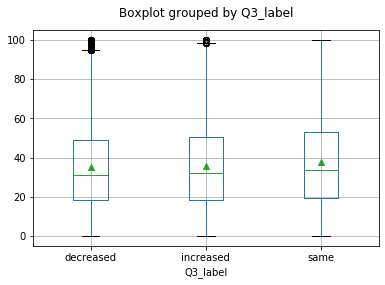

In [131]:
ela_funding_incr  = ela_funding_incr.append([ela_funding_decr, ela_funding_same])
ela_funding_incr.boxplot('level_3_4_1', by = 'Q3_label', meanline = False, showmeans = True)
plt.title('')
plt.show()

In [54]:
# regardless of how I divide it, there is a statistically significant difference between 
# schools with abundant/sufficient funding as compared to those with poor funding 
# (either including or exclusing those who reported N/A for that question)

print(ela_funding_incr_mean)
print(ela_funding_same_mean)
print(ela_funding_decr_mean)
print(ela_funding_incr_samplesize)  # number of schools, not number of observations
print(ela_funding_same_samplesize)
print(ela_funding_decr_samplesize)

# count of data points
ela_pass_rate_df['Q3_label'].value_counts()

36.014742386436026
37.48958029642949
35.06669597492791
346
908
594


The r-squared is: 0.025288149266253918
The p-values is: 0.0


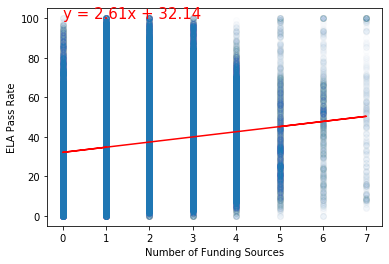

In [145]:
# ELA

# Measure 3: Number of funding sources

# Regression/Correlation: Is there linear relationship between number of funding sources and ELA/Math pass rate
# consider a mixed model regression with a random intercept for school

x_values = ela_pass_rate_df['Q1_funding_sources']
y_values = ela_pass_rate_df['level_3_4_1']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha = .01)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Number of Funding Sources')
plt.ylabel('ELA Pass Rate')
print(f"The r-squared is: {rvalue**2}")
print(f"The p-values is: {pvalue}")
plt.show()

In [161]:
# what is the mean pass rate for those with 1-7 funding sources
print(ela_pass_rate_df.groupby(['Q1_funding_sources']).mean()['level_3_4_1'])
# what is the distribution of schools at each level of funding?
print(ela_pass_rate_df.groupby(['Q1_funding_sources']).count()['level_3_4_1'])

Q1_funding_sources
0    29.512312
1    36.614770
2    37.567943
3    40.525802
4    40.522307
5    41.296897
6    47.712735
7    48.547577
Name: level_3_4_1, dtype: float64
Q1_funding_sources
0    18069
1    29430
2    22685
3    13355
4     5867
5     1712
6      924
7      378
Name: level_3_4_1, dtype: int64


In [157]:
# treat these levels as categorical and run a one-way ANOVA

ela_one_funder = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 1]
ela_two_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 2]
ela_three_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 3]
ela_four_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 4]
ela_five_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 5]
ela_six_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 6]
ela_seven_funders = ela_pass_rate_df[ela_pass_rate_df['Q1_funding_sources'] == 7]


# ANOVA
stats.f_oneway(ela_one_funder['level_3_4_1'], 
               ela_two_funders['level_3_4_1'], 
               ela_three_funders['level_3_4_1'],
               ela_four_funders['level_3_4_1'],
               ela_five_funders['level_3_4_1'],
               ela_six_funders['level_3_4_1'],
               ela_seven_funders['level_3_4_1'])

F_onewayResult(statistic=108.60019190463154, pvalue=6.967470676498308e-137)

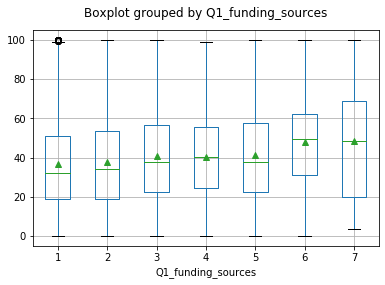

In [160]:
ela_funders = ela_one_funder.append(
               [ela_two_funders, 
               ela_three_funders,
               ela_four_funders,
               ela_five_funders,
               ela_six_funders,
               ela_seven_funders])
ela_funders.boxplot('level_3_4_1', by = 'Q1_funding_sources', meanline = False, showmeans = True)
plt.title('')
plt.show()

### Statistical Tests: Math

In [36]:
# T-Test: Is there a statistically signficant difference in state test pass rates for schools that have self-reported good funding versus schools that have self-reported poor funding?

#  Math

# Measure 1: Sufficient/Insuffcient Funding
math_good_funding = math_pass_rate_df[(math_pass_rate_df['Q2_label'] == 'sufficient') | (math_pass_rate_df['Q2_label'] == 'abundant')]
math_poor_funding = math_pass_rate_df[(math_pass_rate_df['Q2_label'] == 'insufficient') | (math_pass_rate_df['Q2_label'] == 'na')]

# mean of each group
math_good_mean = np.mean(math_good_funding['level_3_4_1'])
math_poor_mean = np.mean(math_poor_funding['level_3_4_1'])

# sample size of each group
math_good_samplesize = len(math_good_funding['DBN'].unique())
math_poor_samplesize = len(math_poor_funding['DBN'].unique())

# Welch's t-test (do not assume equal variance)
stats.ttest_ind(math_good_funding['level_3_4_1'], math_poor_funding['level_3_4_1'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=24.46729986030403, pvalue=3.3688632940797493e-131)

In [38]:
# regardless of how I divide it, there is a statistically significant difference between 
# schools with abundant/sufficient funding as compared to those with poor funding 
# (either including or exclusing those who reported N/A for that question)

print(math_good_mean)
print(math_poor_mean)
print(math_good_samplesize)
print(math_poor_samplesize)

40.108732199413005
35.54345393770013
459
973


In [119]:
# Math

# Measure 2: Funding increase/decrese from prevous school year

# Measure 2: Sufficient/Insuffcient Funding
math_funding_incr = math_pass_rate_df[math_pass_rate_df['Q3_label'] == 'increased']
math_funding_decr = math_pass_rate_df[math_pass_rate_df['Q3_label'] == 'decreased']
math_funding_same = math_pass_rate_df[math_pass_rate_df['Q3_label'] == 'same']

#mean of each group
math_funding_incr_mean = np.mean(math_funding_incr['level_3_4_1'])
math_funding_decr_mean = np.mean(math_funding_decr['level_3_4_1'])
math_funding_same_mean = np.mean(math_funding_same['level_3_4_1'])

# sample size of each group
math_funding_incr_samplesize = len(math_funding_incr['DBN'].unique())
math_funding_decr_samplesize = len(math_funding_decr['DBN'].unique())
math_funding_same_samplesize = len(math_funding_same['DBN'].unique())

# ANOVA
stats.f_oneway(ela_funding_incr['level_3_4_1'], 
               ela_funding_decr['level_3_4_1'], 
               ela_funding_same['level_3_4_1'])

F_onewayResult(statistic=107.85661056674412, pvalue=1.508987240330951e-47)

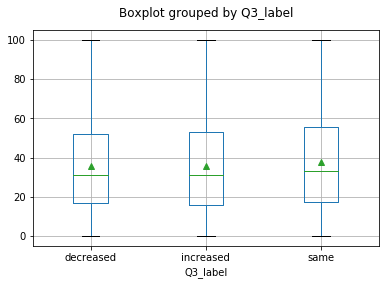

In [130]:
math_funding_incr = math_funding_incr.append([math_funding_decr, math_funding_same])
math_funding_incr.boxplot('level_3_4_1', by = 'Q3_label', meanline = False, showmeans = True)
plt.title('')
plt.show()

In [112]:
# regardless of how I divide it, there is a statistically significant difference between 
# schools with abundant/sufficient funding as compared to those with poor funding 
# (either including or exclusing those who reported N/A for that question)

print(math_funding_incr_mean)
print(math_funding_same_mean)
print(math_funding_decr_mean)
print(math_funding_incr_samplesize)  # number of schools, not number of observations
print(math_funding_same_samplesize)
print(math_funding_decr_samplesize)

35.842603603471325
37.610375960912826
35.576611932923385
345
907
594


same         50214
decreased    27857
increased    13635
Name: Q3_label, dtype: int64

The r-squared is: 0.030309355703685262
The p-values is: 0.0


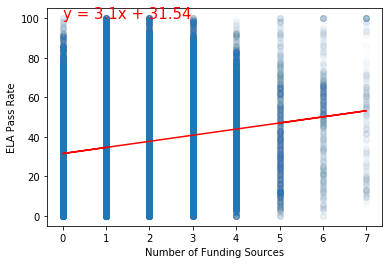

In [162]:
# Math

# Measure 3: Number of funding sources

# Regression/Correlation: Is there linear relationship between number of funding sources and ELA/Math pass rate
# consider a mixed model regression with a random intercept for school

x_values = math_pass_rate_df['Q1_funding_sources']
y_values = math_pass_rate_df['level_3_4_1']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, alpha = .01)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Number of Funding Sources')
plt.ylabel('ELA Pass Rate')
print(f"The r-squared is: {rvalue**2}")
print(f"The p-values is: {pvalue}")
plt.show()

In [163]:
# what is the mean pass rate for those with 1-7 funding sources
print(ela_pass_rate_df.groupby(['Q1_funding_sources']).mean()['level_3_4_1'])
# what is the distribution of schools at each level of funding?
print(ela_pass_rate_df.groupby(['Q1_funding_sources']).count()['level_3_4_1'])

Q1_funding_sources
0    29.512312
1    36.614770
2    37.567943
3    40.525802
4    40.522307
5    41.296897
6    47.712735
7    48.547577
Name: level_3_4_1, dtype: float64
Q1_funding_sources
0    18069
1    29430
2    22685
3    13355
4     5867
5     1712
6      924
7      378
Name: level_3_4_1, dtype: int64


In [164]:
# treat these levels as categorical and run a one-way ANOVA

math_one_funder = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 1]
math_two_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 2]
math_three_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 3]
math_four_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 4]
math_five_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 5]
math_six_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 6]
math_seven_funders = math_pass_rate_df[math_pass_rate_df['Q1_funding_sources'] == 7]


# ANOVA
stats.f_oneway(math_one_funder['level_3_4_1'], 
               math_two_funders['level_3_4_1'], 
               math_three_funders['level_3_4_1'],
               math_four_funders['level_3_4_1'],
               math_five_funders['level_3_4_1'],
               math_six_funders['level_3_4_1'],
               math_seven_funders['level_3_4_1'])

F_onewayResult(statistic=128.2099304690277, pvalue=4.837379725292566e-162)

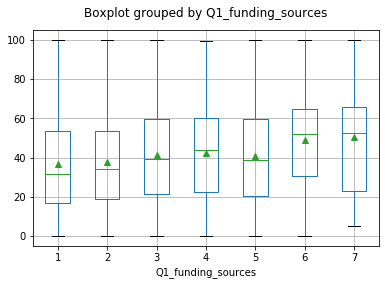

In [165]:
math_funders = math_one_funder.append(
               [ela_two_funders, 
               math_three_funders,
               math_four_funders,
               math_five_funders,
               math_six_funders,
               math_seven_funders])
math_funders.boxplot('level_3_4_1', by = 'Q1_funding_sources', meanline = False, showmeans = True)
plt.title('')
plt.show()

### Summary and Final Visualizations

In [56]:
# Data Summary table:

funding_summary = pd.DataFrame({
                                'Total Schools in Sample': [ela_sample_size],  # same # in math and ELA sample
                                'ELA Pass Rate': [ela_pass_rate],
                                'Math Pass Rate': [math_pass_rate]})
funding_summary

,Total Schools in Sample,ELA Pass Rate,Math Pass Rate
0,1116,36.491825,36.680775


Limitaions:
* Used only part of the dataset and were limited to years with data dictionaries
* Self-report questionnaire
* State tests are point values that may not represent student performance or school quality

Future Directions:
* Break down the funding types (is one more predictive than the others?)
* Chisq to examine whether the distributon of schools with increase/decrese in funding and good/poor funding
